 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, root_dir)

In [2]:
import random
import numpy as np
import pandas as pd
from lib.node import Node
from lib.tree import Tree

In [3]:
file_path = '../data/research/sonar.all-data.csv'
df = pd.read_csv(file_path, header=None)

In [4]:
ls = [x for x in range(60)]
tree = Tree(df, 6, None, range(df.shape[0]-20), ls)
tree.fit()

In [5]:
print(tree.visualize())

digraph Tree {
node [shape=box];
6024831014 [label="X[10] < 0.1734
gini = 0.3866231853353914
samples = 188
distribution = [74, 114]"];
2982352972 [label="X[3] < 0.0525
gini = 0.1908688349366316
samples = 74
distribution = [59, 15]"];
6024831014 -> 2982352972 [labeldistance=8, labelangle=30, xlabel="True"]
4216920791 [label="X[44] < 0.2662
gini = 0.3526099198613819
samples = 114
distribution = [81, 33]"];
6024831014 -> 4216920791 [labeldistance=8, labelangle=-30, xlabel="False"]
9869161638 [label="X[0] < 0.0412
gini = 0.06541778174249183
samples = 59
distribution = [57, 2]"];
2982352972 -> 9869161638 [labeldistance=8, labelangle=30, xlabel="True"]
4500897446 [label="X[44] < 0.1675
gini = 0.1904761904761905
samples = 15
distribution = [7, 8]"];
2982352972 -> 4500897446 [labeldistance=8, labelangle=-30, xlabel="False"]
5345824640 [label="X[35] < 0.5564
gini = 0.35099715099715095
samples = 81
distribution = [65, 16]"];
4216920791 -> 5345824640 [labeldistance=8, labelangle=30, xlabel="True"

In [6]:
tree.predict(df[188:208])

[(0.0, 1.0),
 (0.0, 1.0),
 (1.0, 0.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (1.0, 0.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (0.0, 1.0)]

In [7]:
%%bash 
cd vis
# mac xargs syntax seems different from linux
ls *.dot | xargs -I '{}' dot '{}' -Tpng -O
ls *.dot | xargs -I '{}' dot '{}' -Tsvg -O

In [11]:
%%bash
cd vis
dot -Tpng tree.dot -o tree.png
dot -Tsvg tree.dot -o tree.svg

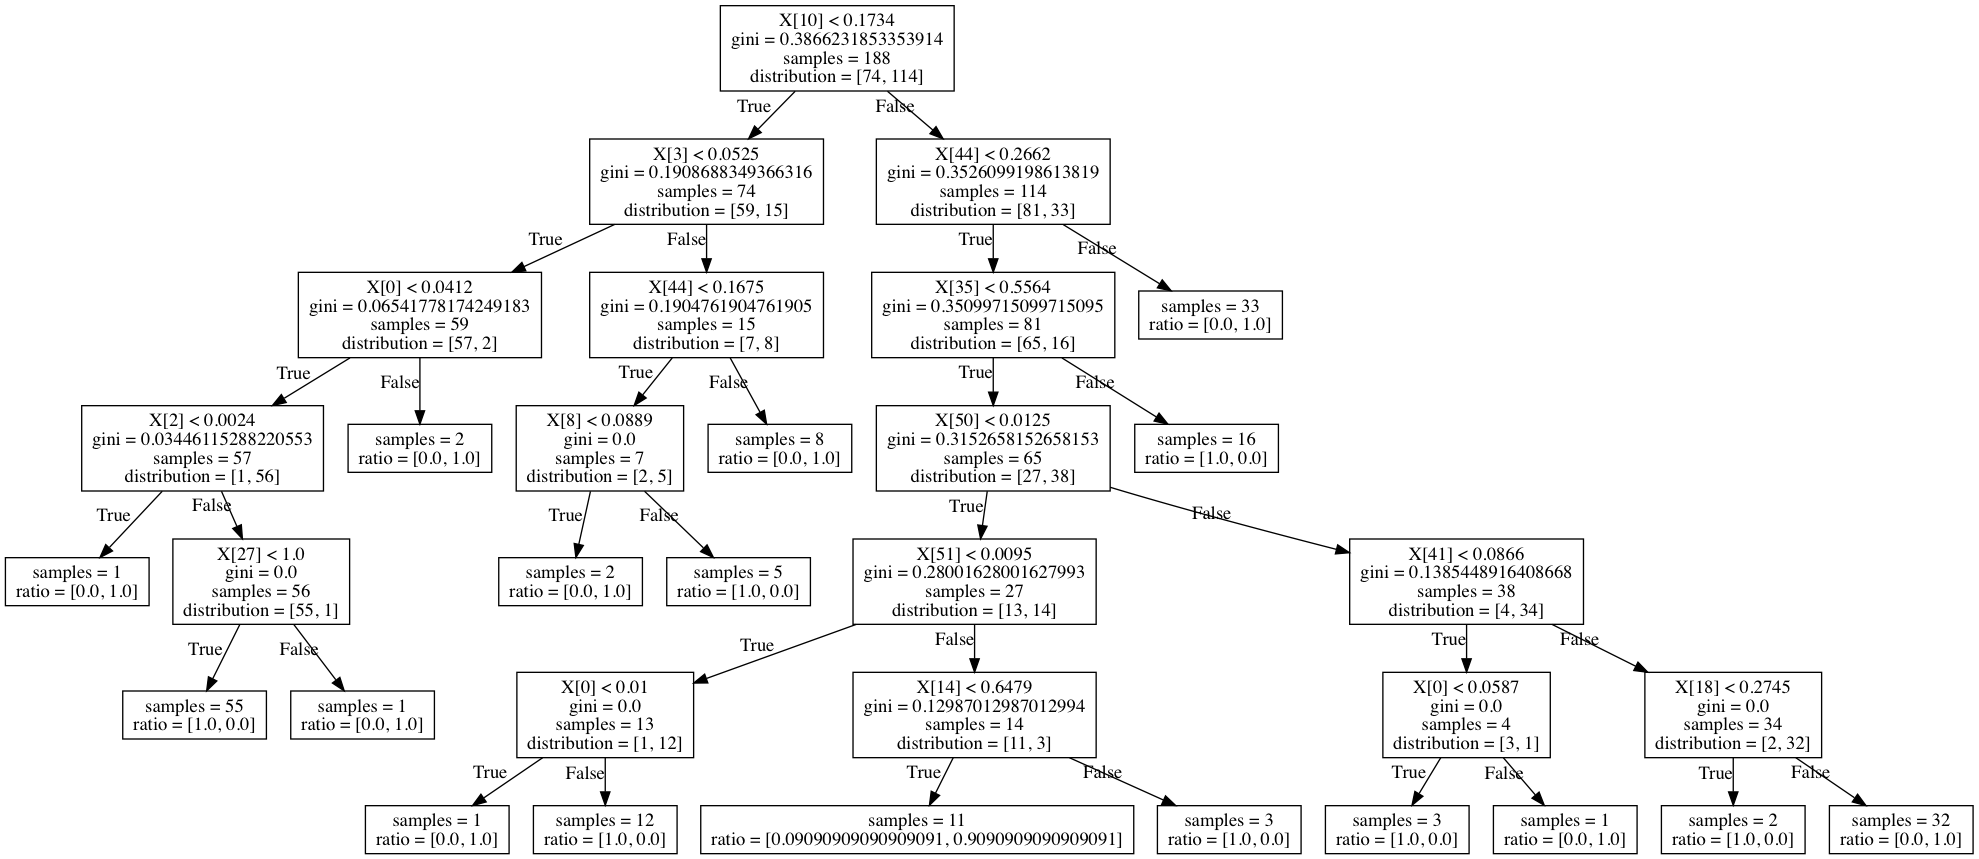

In [9]:
from IPython.display import Image
Image(filename='tree.png')